In [53]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [54]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


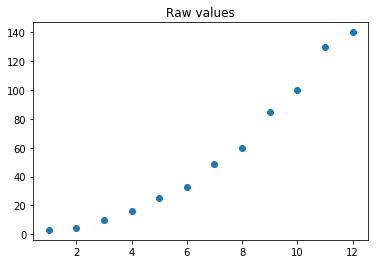

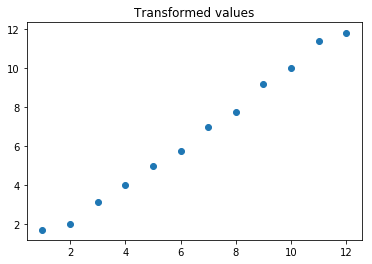

In [55]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

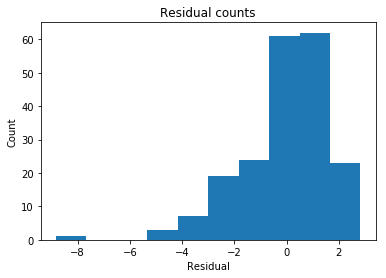

In [56]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

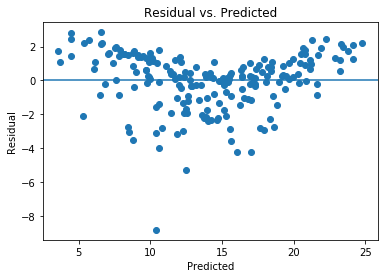

In [57]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [58]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.

In [59]:
# Delete outliers from feature
# Extract predicted values.
predicted.sort()
actual = actual.sort_values(axis=0)

#actual = actual.drop(actual.index[len(actual)-5])
actual = actual[:-5]
actual = actual[5:]
predicted = predicted[:-5]
predicted = predicted[5:]

print(predicted)
print(actual)

[ 5.3075589   5.37034248  5.74215558  6.05162411  6.12602215  6.4891503
  6.55467     6.5707774   6.599669    6.82006767  7.0322992   7.10850249
  7.39497997  7.57483051  7.60769238  7.63888314  7.83807642  7.84904532
  7.88410649  8.14651887  8.16531236  8.1681656   8.42401933  8.44915012
  8.52771254  8.76480262  8.81331353  8.82630048  8.87338673  8.88787996
  9.01603163  9.12734958  9.14402389  9.33981296  9.48964097  9.67530328
  9.69137313  9.70853872  9.76842795  9.8272711   9.90298206  9.90868103
  9.95168206  9.99922965 10.0095377  10.0143112  10.09133403 10.17840799
 10.36684881 10.38419866 10.4276871  10.48212385 10.57712073 10.57717411
 10.5871997  10.62693815 10.82439531 11.0682946  11.3460929  11.44592364
 11.45348627 11.59870739 11.71127101 11.72975995 11.8368039  11.85832174
 11.97093887 11.97874744 12.0370073  12.12295317 12.1620464  12.26335941
 12.30767078 12.33785482 12.38455495 12.39914823 12.47834763 12.4891591
 12.55084872 12.63121132 12.63571716 12.77458802 12.7

In [60]:
# Turn data more symmetric by log
predicted = np.log10(predicted)
actual = np.log10(actual)

# Sort them again
predicted.sort()
actual = actual.sort_values(axis=0)

print(predicted)
print(actual)

[0.72489482 0.73000198 0.75907496 0.78187194 0.78717856 0.81218783
 0.81655083 0.81761675 0.81952215 0.83378868 0.84709734 0.85177812
 0.868937   0.87937292 0.88125294 0.88302987 0.89420949 0.89481684
 0.89675248 0.91097207 0.9119728  0.91212453 0.92551935 0.92681303
 0.93083255 0.94274214 0.94513922 0.94577871 0.94808941 0.94879818
 0.95501543 0.96034468 0.96113735 0.97033818 0.97724978 0.98566459
 0.98638531 0.98715387 0.98982468 0.99243294 0.99576599 0.99601585
 0.99789649 0.99996654 1.00041402 1.00062108 1.00394858 1.00767986
 1.01564676 1.01637299 1.01818799 1.02044929 1.02436746 1.02436965
 1.0247811  1.02640815 1.03440364 1.04408071 1.05484634 1.05865084
 1.0589377  1.06440959 1.06860403 1.06928912 1.07323445 1.07402323
 1.07812821 1.07841141 1.08051852 1.08360843 1.08500666 1.08860946
 1.09017587 1.09123966 1.0928804  1.09339185 1.09615708 1.0965332
 1.09867309 1.101445   1.1015999  1.1063469  1.10673201 1.10801188
 1.11125206 1.12020106 1.12092557 1.12591199 1.13223233 1.13438

In [61]:
# Calculate the error, also called the residual.
residual = actual - predicted
residual = residual.sort_values(axis=0)
#residual = residual[1:]

# Remove another outlier
print(residual)

67    -0.039
4     -0.036
197   -0.035
83    -0.035
43    -0.034
131   -0.034
179   -0.034
159   -0.033
161   -0.033
35    -0.033
57    -0.032
146   -0.032
199   -0.032
115   -0.032
88    -0.032
110   -0.032
7     -0.031
21    -0.029
71    -0.027
87    -0.024
16    -0.024
27    -0.024
165   -0.023
63    -0.023
25    -0.022
86    -0.022
77    -0.022
120   -0.022
150   -0.022
96    -0.022
       ...  
166    0.020
12     0.021
32     0.021
76     0.021
17     0.021
93     0.022
2      0.023
66     0.023
69     0.023
65     0.023
15     0.023
10     0.024
5      0.024
61     0.024
117    0.025
0      0.025
121    0.026
52     0.026
128    0.026
75     0.027
107    0.028
34     0.029
101    0.029
170    0.029
47     0.030
119    0.032
44     0.033
58     0.036
55     0.038
36     0.038
Name: Sales, Length: 190, dtype: float64


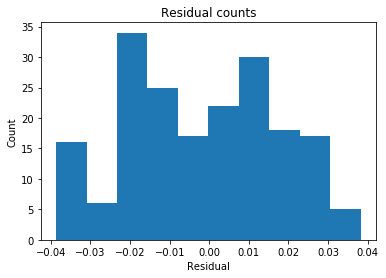

In [62]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

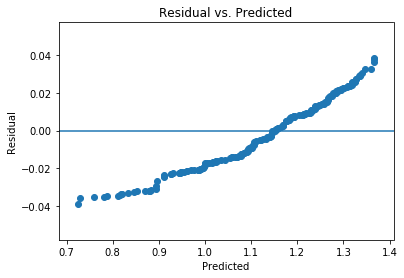

In [63]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()